<a href="https://colab.research.google.com/github/Danicanarion/CNN-Tests-Dogs-AndCats/blob/master/Perros_Gatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


dogs_and_cats  Sign-Language  test_happy.h5  train_happy.h5


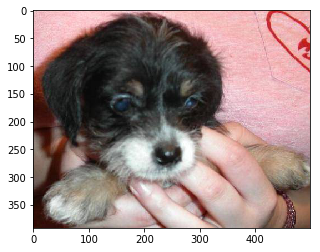

In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/datasets"
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats/train/dogs/dog.290.jpg', 'r')
imshow(np.asarray(pil_im))



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## Modelo con RMSProp



 Importamos librerías necesarias y configuramos la entrada, usando un ImageDataGenerator para modificar las imagenes de entrada a fin de aumentar el número de las mismas.
 

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import backend as K
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras
from time import time

batch_size = 20
epochs = 30

train_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats/train'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats/validation'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Using TensorFlow backend.


Found 2000 images belonging to 2 classes.
Found 1002 images belonging to 2 classes.


Definimos un modelo con 3 CNN y 2 capas densas.

In [0]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=RMSprop(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Aquí tenemos un resumen de la red.

In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

Entrenamos el modelo con las entradas anteriormente generadas.

In [0]:
data = model.fit_generator(
        train_generator,
        steps_per_epoch= 100,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 21s 215ms/step - loss: 0.5163 - acc: 0.7390 - val_loss: 0.4623 - val_acc: 0.7953
Epoch 2/30
100/100 [==============================] - 19s 185ms/step - loss: 0.5247 - acc: 0.7490 - val_loss: 0.4937 - val_acc: 0.7556
Epoch 3/30
100/100 [==============================] - 19s 185ms/step - loss: 0.5227 - acc: 0.7425 - val_loss: 0.5066 - val_acc: 0.7230
Epoch 4/30
100/100 [==============================] - 20s 203ms/step - loss: 0.5177 - acc: 0.7640 - val_loss: 0.5242 - val_acc: 0.7403
Epoch 5/30
100/100 [==============================] - 20s 195ms/step - loss: 0.5124 - acc: 0.7460 - val_loss: 0.5111 - val_acc: 0.7556
Epoch 6/30
100/100 [==============================] - 19s 190ms/step - loss: 0.5227 - acc: 0.7520 - val_loss: 0.4458 - val_acc: 0.7912
Epoch 7/30
100/100 [==============================] - 19s 185ms/step - loss: 0.4998 - acc: 0.7710 - val_loss: 0.4641 - val_acc: 0.7688
Epoch 8/30
100/100 [==============================] - 1